In [ ]:
#import pandas
import pandas as pd

#import x and y data
# x_data = pd.read_csv(r'C:\Users\nflfa\Desktop\Git\ControlProject\RawData\RawData.csv')
# y_data = pd.read_csv(r'C:\Users\nflfa\Desktop\Git\ControlProject\RawData\RawData_Label.csv')

# x_data = pd.read_csv("RawData/RawData.csv", sep = "\t", header = None,)
x_data = pd.read_csv('https://raw.githubusercontent.com/carsonmcbroom/ControlProject/main/RawData/RawData.csv')
y_data = pd.read_csv('https://raw.githubusercontent.com/carsonmcbroom/ControlProject/main/RawData/RawData_Label.csv')


print(x_data.head)
print(y_data.head)

In [ ]:
#filling empty values with the attribute mean
x_data = x_data.fillna(x_data.mean())
y_data = y_data.fillna(y_data.mean())

print(x_data)
print(y_data)

In [ ]:
#set final x and y values
x = x_data.drop(columns = "Index")
y = y_data['label']

print(x)
print(y)

In [22]:
#importing sklearn to transform and split the data
import sklearn

#x data must be scaled with standard scaler
from sklearn.preprocessing import StandardScaler as SS
scale = SS()
x = scale.fit_transform(x)
print(x)

[[ 0.08664537 -0.50970248 -0.16012282 ...  0.21032274  0.
  -1.04002786]
 [ 0.08484114 -0.36657441  0.48080693 ... -0.37472402  0.
  -1.04002786]
 [ 0.08177297  1.01491128 -0.47763976 ... -0.84601891  0.
  -1.04002786]
 ...
 [-2.27822554  4.42876952  7.39632641 ...  6.11931653  0.
  -0.11188848]
 [-2.28305605  5.94482901  7.71098657 ...  6.1003848   0.
  -0.11188848]
 [-2.27776132  3.94805947  8.16328136 ...  5.44054313  0.
  -0.11188848]]


In [23]:
#split training and test data
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x, y, test_size = 0.2, random_state = 42)

In [24]:
#time to do dimensionality reduction
#Using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(xtrain)

In [ ]:
#Using TSNE
from sklearn.manifold import TSNE
tsne_data = TSNE(n_components = 2).fit_transform(xtrain)

In [26]:
#Using SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 2)
svd_data = svd.fit_transform(xtrain)

In [27]:
#Using isomap
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
iso_data = iso.fit_transform(xtrain)

In [28]:
#Using LLE
from sklearn.manifold import LocallyLinearEmbedding as LLE
lle_data = LLE(n_components = 2).fit_transform(xtrain)

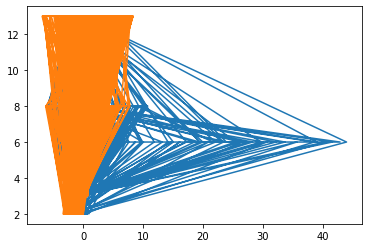

In [29]:
#plotting reduced data vs ytrain data
import matplotlib.pyplot as plt
plt.plot(pca_data, ytrain)

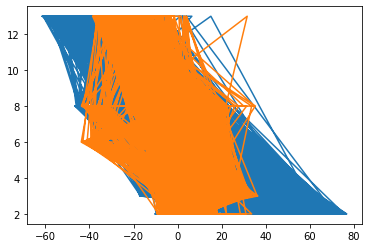

In [30]:
plt.plot(tsne_data, ytrain)

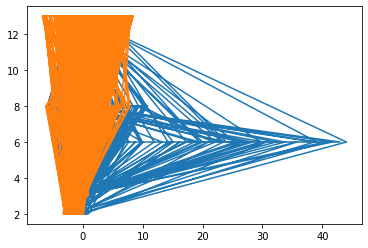

In [31]:
plt.plot(svd_data, ytrain)

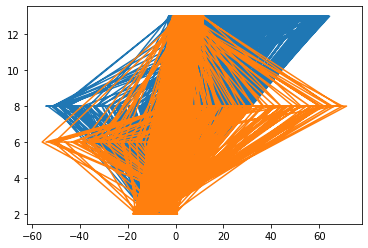

In [32]:
plt.plot(iso_data, ytrain)

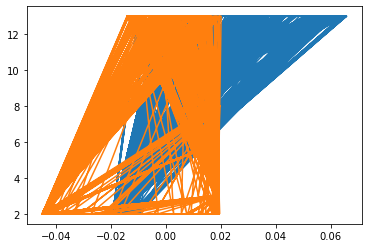

In [33]:
plt.plot(lle_data, ytrain)

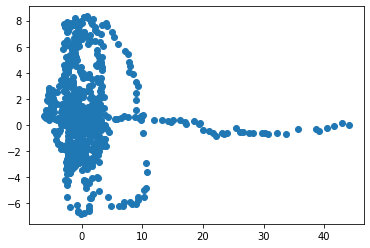

In [34]:
#plotting as scatter plots for clustering
plt.scatter(pca_data[:,0], pca_data[:,1])
plt.show()

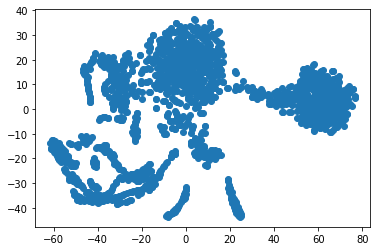

In [35]:
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.show()

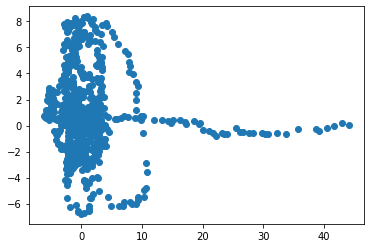

In [36]:
plt.scatter(svd_data[:,0], svd_data[:,1])
plt.show()

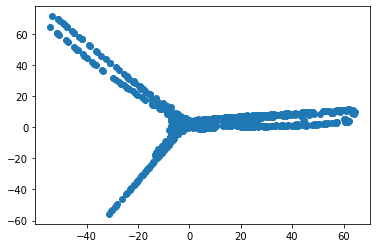

In [37]:
plt.scatter(iso_data[:,0], iso_data[:,1])
plt.show()

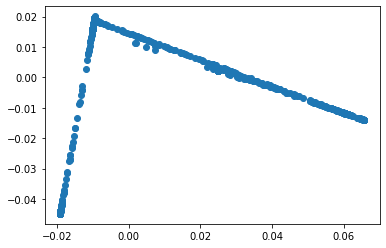

In [38]:
plt.scatter(lle_data[:,0], lle_data[:,1])
plt.show()

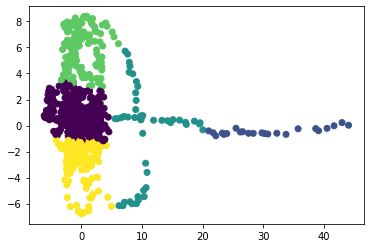

In [58]:
#Using tsne and svd data for clustering

#starting with KMeans on SVD data
from sklearn.cluster import KMeans as KM
kmeans = KM(init = "k-means++", n_clusters = 5, n_init = 10).fit(svd_data)
p_svd = kmeans.predict(svd_data)
plt.scatter(svd_data[:,0], svd_data[:,1], c=p_svd)

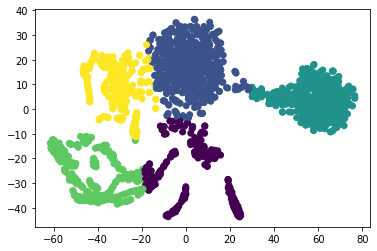

In [40]:
#Kmeans on TSNE data
kmeans = KM(init = "k-means++", n_clusters = 5, n_init = 10).fit(tsne_data)
p_tsne = kmeans.predict(tsne_data)
plt.scatter(tsne_data[:,0], tsne_data[:,1], c=p_tsne)

In [41]:
#Now using DBScan (Density Based)
from sklearn.cluster import DBSCAN

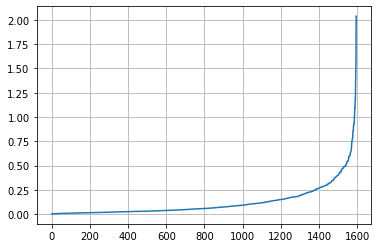

In [42]:
#in order to use DBScan, epsilon must be chosen and can be determined from nearest neighbors
from sklearn.neighbors import NearestNeighbors as NN
import numpy as np
nabrs = NN(n_neighbors = 2).fit(svd_data)
distance, index = nabrs.kneighbors(svd_data)
distance = np.sort(distance, axis = 0)
distance = distance[:,1]
plt.grid()
plt.plot(distance)

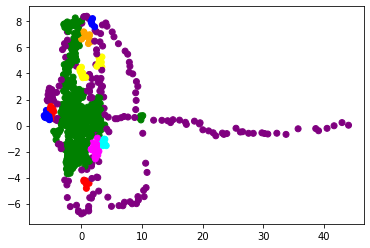

In [43]:
#0.5 looks like the point of maximum curvature
db = DBSCAN(eps = 0.5).fit(svd_data)
clusters = db.labels_
color_list = ['green', 'blue', 'red', 'yellow',  'orange',  'magenta', 'cyan', 'purple']
vectorizer = np.vectorize(lambda x: color_list[x % len(color_list)])
plt.scatter(svd_data[:,0], svd_data[:,1], c = vectorizer(clusters))

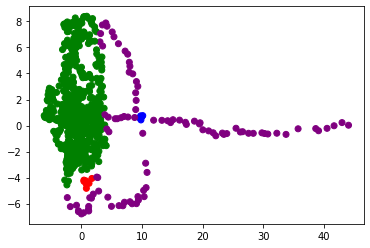

In [44]:
#0.5 looks awful trying 0.75
db = DBSCAN(eps = 0.75).fit(svd_data)
clusters = db.labels_
color_list = ['green', 'blue', 'red', 'yellow',  'orange',  'magenta', 'cyan', 'purple']
vectorizer = np.vectorize(lambda x: color_list[x % len(color_list)])
plt.scatter(svd_data[:,0], svd_data[:,1], c = vectorizer(clusters))

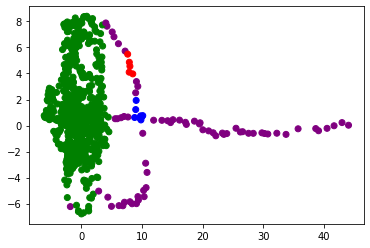

In [45]:
#testing 1
db = DBSCAN(eps = 1).fit(svd_data)
clusters = db.labels_
color_list = ['green', 'blue', 'red', 'yellow',  'orange',  'magenta', 'cyan', 'purple']
vectorizer = np.vectorize(lambda x: color_list[x % len(color_list)])
plt.scatter(svd_data[:,0], svd_data[:,1], c = vectorizer(clusters))

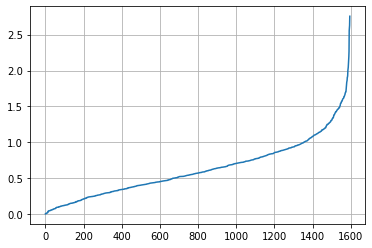

In [46]:
#doing dbscan for tsne data
nabrs = NN(n_neighbors = 2).fit(tsne_data)
distance, index = nabrs.kneighbors(tsne_data)
distance = np.sort(distance, axis = 0)
distance = distance[:,1]
plt.grid()
plt.plot(distance)

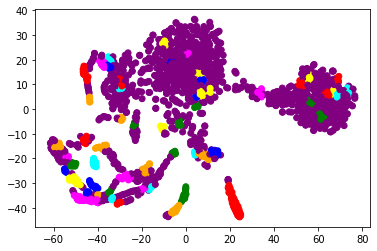

In [47]:
#1.25 looks like a good value for epsilon
db = DBSCAN(eps = 1.25).fit(tsne_data)
clusters = db.labels_
color_list = ['green', 'blue', 'red', 'yellow',  'orange',  'magenta', 'cyan', 'purple']
vectorizer = np.vectorize(lambda x: color_list[x % len(color_list)])
plt.scatter(tsne_data[:,0], tsne_data[:,1], c = vectorizer(clusters))

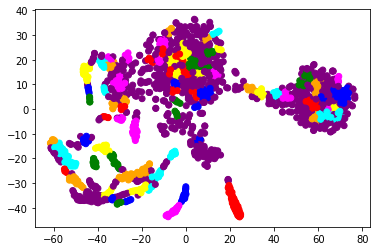

In [48]:
#trying 1.5
db = DBSCAN(eps = 1.5).fit(tsne_data)
clusters = db.labels_
color_list = ['green', 'blue', 'red', 'yellow',  'orange',  'magenta', 'cyan', 'purple']
vectorizer = np.vectorize(lambda x: color_list[x % len(color_list)])
plt.scatter(tsne_data[:,0], tsne_data[:,1], c = vectorizer(clusters))

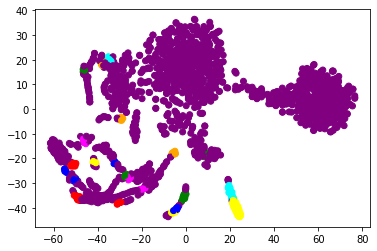

In [49]:
#trying 1
db = DBSCAN(eps = 1).fit(tsne_data)
clusters = db.labels_
color_list = ['green', 'blue', 'red', 'yellow',  'orange',  'magenta', 'cyan', 'purple']
vectorizer = np.vectorize(lambda x: color_list[x % len(color_list)])
plt.scatter(tsne_data[:,0], tsne_data[:,1], c = vectorizer(clusters))

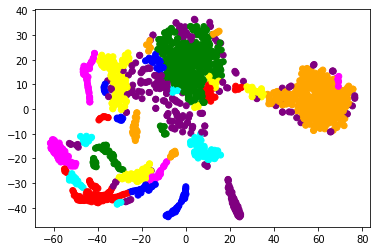

In [68]:
#trying 2
db = DBSCAN(eps = 2).fit(tsne_data)
clusters = db.labels_
color_list = ['green', 'blue', 'red', 'yellow',  'orange',  'magenta', 'cyan', 'purple']
vectorizer = np.vectorize(lambda x: color_list[x % len(color_list)])
plt.scatter(tsne_data[:,0], tsne_data[:,1], c = vectorizer(clusters))

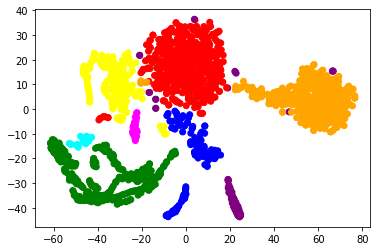

In [51]:
#trying 3
db = DBSCAN(eps = 3).fit(tsne_data)
clusters = db.labels_
color_list = ['green', 'blue', 'red', 'yellow',  'orange',  'magenta', 'cyan', 'purple']
vectorizer = np.vectorize(lambda x: color_list[x % len(color_list)])
plt.scatter(tsne_data[:,0], tsne_data[:,1], c = vectorizer(clusters))

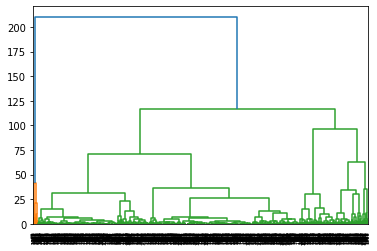

In [52]:
#Final clustering method will be Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering as AC
import scipy.cluster.hierarchy as sch
#The highest vertical distance that doesn't intersect with any clusters gives the optimal number of clusters which would be 
# 2 in this case. But we know that there are 5 individual labels so we'll use 5. 
dendrogram = sch.dendrogram(sch.linkage(svd_data, method='ward'))

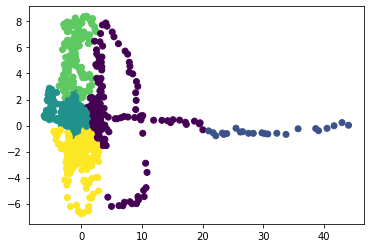

In [53]:
#Using agglomerative clustering with 5 clusters
svd_clusters = AC(n_clusters=5).fit(svd_data)
color = svd_clusters.labels_
plt.scatter(svd_data[:,0], svd_data[:,1], c = color)

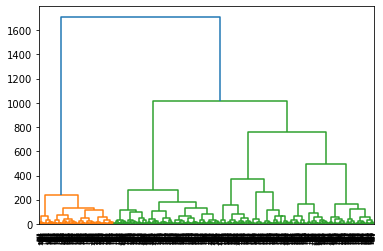

In [54]:
#Now doing AC with TSNE data
#Looks like 3 might be the best, but, again, with knowledge of the labels we'll use 5. 
dendrogram = sch.dendrogram(sch.linkage(tsne_data, method='ward'))

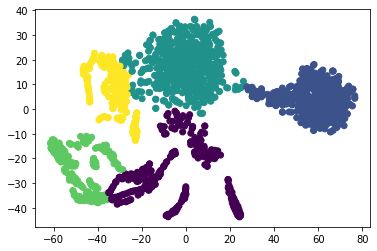

In [55]:
tsne_clusters = AC(n_clusters=5).fit(tsne_data)
color = tsne_clusters.labels_
plt.scatter(tsne_data[:,0], tsne_data[:,1], c = color)